## Prediction of Career Lengths of NBA Players

The dataset details the performance metrics of NBA players and whether their careers span more than 5 years or not. 

### Aim
The task is to predict whether the careers of these players will span for more than 5 years or less.


### Feature descriptions:
The dataset contains columns giving values for points attained by NBA players in their careers. The description of the features is as given below


|Features|Description|
|----|----|
|Name| Name of the Player|
|Games Played|Number of Games Played by the player|
|Minutes| Minutes Played
|Points| Points Per Game|
|Field Goals Made| Successful field goals made|
|Field Goals Attempted | Field goals attempted |
|Field Goals Percentage | Percentage of successful field goals out of the field goals attempted|
|3 Pointers Made| Successful 3 pointer attempts|
|3 Pointers Attempted | Total 3 pointers attempted|
|3 Pointers Percentage | Percentage of successful 3 pointers out of those attempted|
|Free Throws Made| Successful number of free throws | 
|Free Throws Attempted| Total attempted number of free throws|
|Free Throw Percentage| Successful number of free throws out of those attempted|
|OREB|Offesnisve Rebounds|
|DREB|Defensive Rebounds |
|REB|Rebounds|
|AST|Assists|
|STL|Steals|
|BLK|Number of blocks|
|TOV |Number of Turnovers|
|Play for more than 5 years or less| 1 if career length is greater than 5 years else 0 if career length is less than 5 years|

### Loading Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score,accuracy_score,classification_report,roc_curve,confusion_matrix
pd.set_option('display.max_columns',None)

### Read the data. List the categorical and continuous features in the dataset. Find the number of null values in every feature and impute them appropriately. 

In [2]:
# Read the data
df = pd.read_csv('NBA_players.csv')

In [3]:
df.head()

,Name,Games Played,Minutes,Points,Field Goals Made,Field Goals Attempted,Field Goals Percentage,3 Pointers Made,3 Pointers Attempted,3 Pointers Percentage,Free Throws Made,Free Throws Attempted,Fre Throw Percentage,OREB,DREB,REB,AST,STL,BLK,TOV,Play for more than 5 years or less
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


In [4]:
# renaming a target variable.
df.rename(columns={'Play for more than 5 years or less':'Target'},inplace=True)

# dropping feature Name
df.drop('Name',axis=1,inplace=True)

## identify categorical and numerical columns

In [5]:
# Function to identify numeric features
def numeric_features(dataset):
    numeric_col = dataset.select_dtypes(include=np.number).columns.tolist()
    return dataset[numeric_col].head()

numeric_columns = numeric_features(df)
print("Numeric Features:")
print(numeric_columns)
print("===="*20)

# Function to identify categorical features
def categorical_features(dataset):
    categorical_col = dataset.select_dtypes(exclude=np.number).columns.tolist()
    return dataset[categorical_col].head()

categorical_columns = categorical_features(df)
print("Categorical Features:")
print(categorical_columns)

Numeric Features:
   Games Played  Minutes  Points  Field Goals Made  Field Goals Attempted  \
0            36     27.4     7.4               2.6                    7.6   
1            35     26.9     7.2               2.0                    6.7   
2            74     15.3     5.2               2.0                    4.7   
3            58     11.6     5.7               2.3                    5.5   
4            48     11.5     4.5               1.6                    3.0   

   Field Goals Percentage  3 Pointers Made  3 Pointers Attempted  \
0                    34.7              0.5                   2.1   
1                    29.6              0.7                   2.8   
2                    42.2              0.4                   1.7   
3                    42.6              0.1                   0.5   
4                    52.4              0.0                   0.1   

   3 Pointers Percentage  Free Throws Made  Free Throws Attempted  \
0                   25.0               1.

## checking missing data or null values

In [6]:
# Function to check missing data.
def missing_data(dataset):
    count = dataset.isnull().sum().sort_values(ascending = False)
    percentage = dataset.isnull().sum()/dataset.isnull().count().sort_values(ascending = False)
    missing_data = pd.concat([count,percentage],axis = 1,keys=['Count','Percentage'])
    return missing_data
    
missing_data = missing_data(df)
print(missing_data)

                        Count  Percentage
3 Pointers Attempted        0    0.000000
3 Pointers Made             0    0.000000
3 Pointers Percentage      11    0.008209
AST                         0    0.000000
BLK                         0    0.000000
DREB                        0    0.000000
Field Goals Attempted       0    0.000000
Field Goals Made            0    0.000000
Field Goals Percentage      0    0.000000
Fre Throw Percentage        0    0.000000
Free Throws Attempted       0    0.000000
Free Throws Made            0    0.000000
Games Played                0    0.000000
Minutes                     0    0.000000
OREB                        0    0.000000
Points                      0    0.000000
REB                         0    0.000000
STL                         0    0.000000
TOV                         0    0.000000
Target                      0    0.000000


## Handling missing value

In [7]:
# Handling missing values

df['3 Pointers Percentage'].describe()

# as this are percentage of 3 points made / 3 points attempted we can impute the missing values with 0 
# because some players might not have attempted or scored a 3 pointer 

df['3 Pointers Percentage'].fillna('0',inplace=True)

# all null values handled
df.isnull().sum()

Games Played              0
Minutes                   0
Points                    0
Field Goals Made          0
Field Goals Attempted     0
Field Goals Percentage    0
3 Pointers Made           0
3 Pointers Attempted      0
3 Pointers Percentage     0
Free Throws Made          0
Free Throws Attempted     0
Fre Throw Percentage      0
OREB                      0
DREB                      0
REB                       0
AST                       0
STL                       0
BLK                       0
TOV                       0
Target                    0
dtype: int64

### Seperate the independent features and target

In [8]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [9]:
X.head(5)

,Games Played,Minutes,Points,Field Goals Made,Field Goals Attempted,Field Goals Percentage,3 Pointers Made,3 Pointers Attempted,3 Pointers Percentage,Free Throws Made,Free Throws Attempted,Fre Throw Percentage,OREB,DREB,REB,AST,STL,BLK,TOV
0,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3
1,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6
2,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0
3,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0
4,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8


In [10]:
y.head(5)

0    0.0
1    0.0
2    0.0
3    1.0
4    1.0
Name: Target, dtype: float64

In [11]:
# changing type of target variable
y = y.astype('int64')

### Check for class distribution in the target

In [12]:
y.value_counts(normalize=True)

1    0.620149
0    0.379851
Name: Target, dtype: float64

### Plot the distribution of each feature, so that we have a better understanding about the distribution of each feature. Draw the number of values for each category feature and the histogram of the values for each continuous feature.

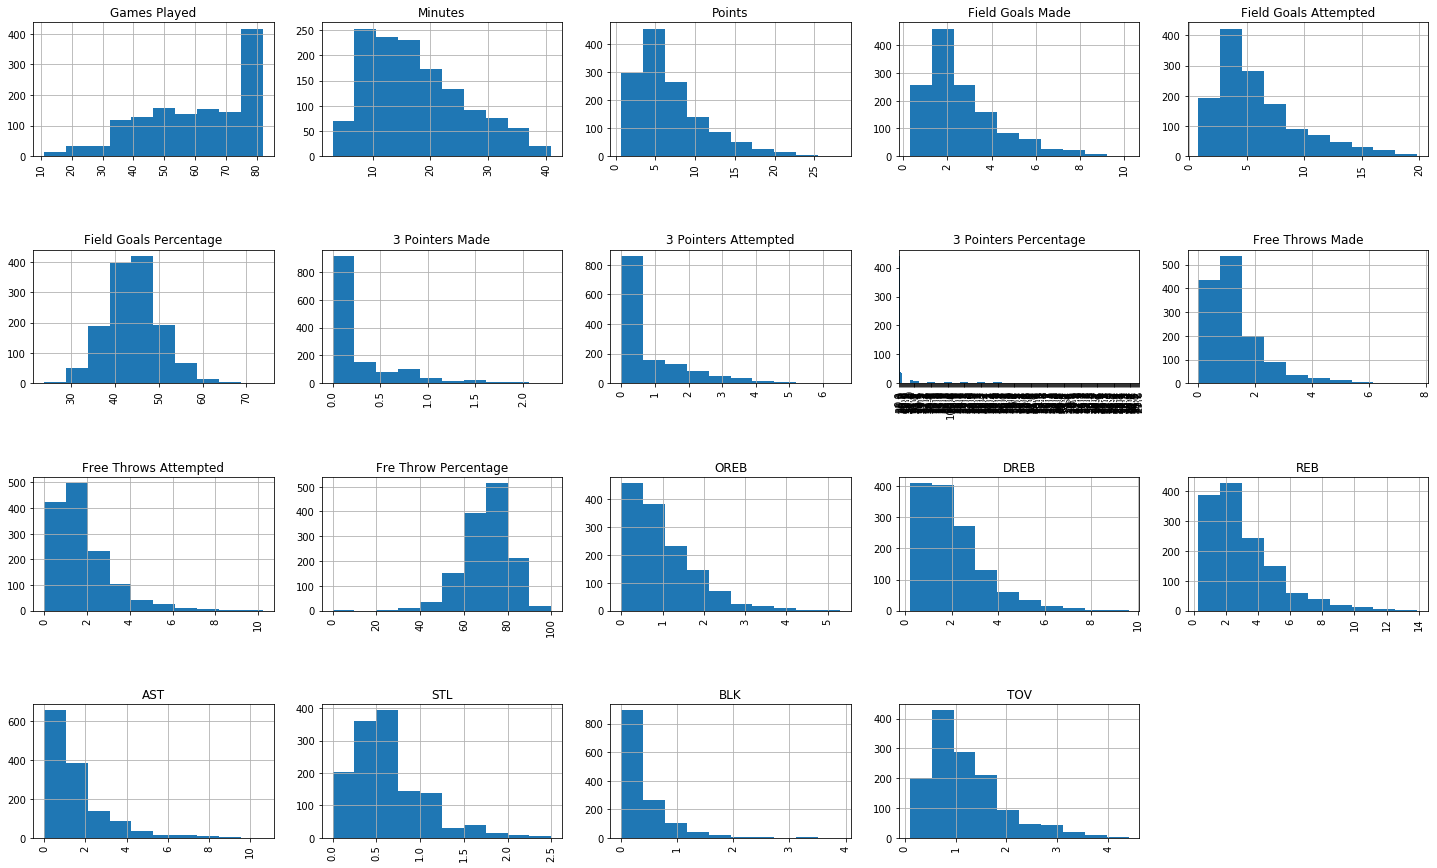

In [13]:
fig = plt.figure(figsize=(25, 15))
cols = 5
rows = np.ceil(float(X.shape[1]) / cols)

for i,column in enumerate(X.columns):
    ax = fig.add_subplot(rows,cols,i+1)
    ax.set_title(column)
    if X.dtypes[column] == np.object:
        X[column].value_counts().plot(kind="bar",axes=ax)
    else:
        X[column].hist(axes=ax)
        plt.xticks(rotation='vertical')

        plt.subplots_adjust(hspace=0.7 ,wspace=0.2)

### Let's check the amount of skewness in our continuous predictors and depending on the type of skewness, let's apply the necessary transformations for removing the skewness

In [14]:
import scipy.stats as scs

features = []
skewness = []
for i in X.select_dtypes(include=np.number).columns:
    features.append(i)
    skewness.append(scs.skew(X[i]))
skewed = pd.DataFrame({'Features':features,'Skewness':skewness})

# If skewness is greater than 1 the feature is highly positively skewed
positively_skewed_variables = skewed[(skewed['Skewness']>1)]

# If the skewness is less than -1 the feature is highly negatively skewed.
negatively_skewed_variables = skewed[(skewed['Skewness']<0)]

print('Positively Skewed Features \n',positively_skewed_variables)
print('*'*50)
print('Negatively Skewed Features \n',negatively_skewed_variables) 

# Let's remove the skewness in the positively skewed variables by using a log transform
for i in positively_skewed_variables['Features']:
    X[i] = np.sqrt(X[i])

for i in negatively_skewed_variables['Features']:
    X[i] = X[i]**3

Positively Skewed Features 
                  Features  Skewness
2                  Points  1.386670
3        Field Goals Made  1.341041
4   Field Goals Attempted  1.294430
6         3 Pointers Made  2.030539
7    3 Pointers Attempted  1.810406
8        Free Throws Made  1.939825
9   Free Throws Attempted  1.842416
11                   OREB  1.437972
12                   DREB  1.487014
13                    REB  1.480077
14                    AST  2.130429
15                    STL  1.363271
16                    BLK  2.801012
17                    TOV  1.339239
**************************************************
Negatively Skewed Features 
                 Features  Skewness
0           Games Played -0.477208
10  Fre Throw Percentage -0.767003


In [15]:
print(X.skew())

Games Played              0.179669
Minutes                   0.632257
Points                    0.695550
Field Goals Made          0.659458
Field Goals Attempted     0.689571
Field Goals Percentage    0.208479
3 Pointers Made           0.813275
3 Pointers Attempted      0.647988
3 Pointers Percentage     0.301290
Free Throws Made          0.814065
Free Throws Attempted     0.775634
Fre Throw Percentage      0.432612
OREB                      0.514474
DREB                      0.627066
REB                       0.659296
AST                       0.941660
STL                       0.458849
BLK                       0.721281
TOV                       0.594852
dtype: float64


### Split train and test data into X_train ,y_train,X_test and y_test data and apply a vanilla logistic regression model

In [16]:
# Split into training and testing
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.3)


# Apply a Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
print('The AUC_ROC_score for a logistic regression model is :' ,roc_auc_score(y_test,y_pred))
print('The accuracy for logistic regression is : ', accuracy_score(y_test,y_pred))

The AUC_ROC_score for a logistic regression model is : 0.6153064415259537
The accuracy for logistic regression is :  0.6741293532338308


### Lets now train our data with Decision tree model. We will then predict our test data and compute the accuracy as well as the `roc_auc_score`.

- Train a decision tree (DecisionTreeClassifier) with a maximum depth of 3, and evaluate the accuracy metric i.e `roc_auc_score` on the test data. Use parameter `random_state = 42` for results reproducibility.

In [18]:
dt = DecisionTreeClassifier(random_state=42,max_depth=3)

dt.fit(X_train,y_train)

y_pred_dt = dt.predict(X_test)

print('The AUC_ROC_score for a decision tree model is :' ,roc_auc_score(y_test,y_pred_dt))
print('The accuracy for decision tree is : ', accuracy_score(y_test,y_pred_dt))
print(classification_report(y_test,y_pred_dt))

The AUC_ROC_score for a decision tree model is : 0.5873983739837398
The accuracy for decision tree is :  0.6442786069651741
              precision    recall  f1-score   support

           0       0.57      0.33      0.42       156
           1       0.67      0.84      0.74       246

    accuracy                           0.64       402
   macro avg       0.62      0.59      0.58       402
weighted avg       0.63      0.64      0.62       402



### Next let's implement a Stacking Classifier consisting of one Decision Tree and Logistic regression and a  decision tree model as a meta classifier.

In [26]:
from mlxtend.classifier import StackingClassifier

classifier1 = LogisticRegression(C=0.1)
classifier2 = DecisionTreeClassifier(max_depth = 3,criterion='entropy',random_state = 42)

classifier_list = [classifier1,classifier2]
m_classifier = DecisionTreeClassifier(max_depth = 6,criterion='gini',random_state = 42)
# m_classifier = LogisticRegression()

stacking_clf = StackingClassifier(classifiers = classifier_list , meta_classifier = m_classifier)

stacking_clf.fit(X_train,y_train)

y_pred_sclf = stacking_clf.predict(X_test)

s_score=stacking_clf.score(X_test,y_test)

print("Test score: %.2f " % s_score)

print('AUC_ROC_score is ',roc_auc_score(y_test,y_pred))

Test score: 0.65 
AUC_ROC_score is  0.6153064415259537


###  Now let's apply a Random Forest model
- Let the parameters for the model be `criterion='gini'`, `max_depth= 6`,`max_features= 'auto'`,`n_estimators= 11`

In [27]:
rf = RandomForestClassifier(criterion='gini',max_depth = 6,max_features = 'auto',n_estimators =11)

rf.fit(X_train,y_train)

y_pred_rf = rf.predict(X_test)

rf_score = rf.score(X_test,y_test)

print("accuracy score",rf_score)

print('AUC_ROC_score is ',roc_auc_score(y_test,y_pred_rf))

accuracy score 0.6741293532338308
AUC_ROC_score is  0.631722951844903


### Let's try improving upon the accuracy of the Random Forest using hyperparameter tuning

In [28]:
parameter_grid = {'n_estimators':[10,20,30,50,100],'criterion':['entropy','gini'],'max_depth':[3,6,8,9,10],'bootstrap':[True,False],
                 'max_features':['auto','sqrt','log2']}

rfc = RandomForestClassifier(random_state = 2)

grid_search = GridSearchCV(rfc,parameter_grid,cv=3)

grid_search.fit(X_train,y_train)

grid_search.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 'auto',
 'n_estimators': 30}

In [29]:
rfc = RandomForestClassifier(criterion='entropy',max_depth = 6, max_features='auto',bootstrap='True',n_estimators=30)

rfc.fit(X_train,y_train)

y_pred_rfc = rfc.predict(X_test)

rfc_score = rfc.score(X_test,y_test)

print("accuracy score",rfc_score)

print('AUC_ROC_score is ',roc_auc_score(y_test,y_pred_rfc))

accuracy score 0.6890547263681592
AUC_ROC_score is  0.6521263289555972


### Now let's apply a Voting Classifier that consists of three models - Logistic Regression, Decision Tree and a Random Forest with a soft voting

In [31]:
# Import libraries
from sklearn.ensemble import VotingClassifier

# Various models
clf_1 = LogisticRegression()
clf_2 = DecisionTreeClassifier(random_state=4)
clf_3 = RandomForestClassifier(random_state=4)

model_list = [('lr',clf_1),('DT',clf_2),('RF',clf_3)]

# Code starts here
# Initialize voting classifier
voting_clf_soft = VotingClassifier(estimators=model_list,voting='soft')

# Fit the model on training data
voting_clf_soft.fit(X_train,y_train)

# predict on test
y_pred_vot = voting_clf_soft.predict(X_test)

print(roc_auc_score(y_test,y_pred_vot))
print(accuracy_score(y_test,y_pred_vot))
print(classification_report(y_test,y_pred_vot))

0.6042057535959975
0.6318407960199005
              precision    recall  f1-score   support

           0       0.53      0.48      0.50       156
           1       0.69      0.73      0.71       246

    accuracy                           0.63       402
   macro avg       0.61      0.60      0.61       402
weighted avg       0.63      0.63      0.63       402



### Let's check how a bagging classifier using a Decision Tree performs on our data

In [39]:
# Import Bagging Classifier
from sklearn.ensemble import BaggingClassifier

# Initialize Bagging Classifier
bagging_clf = BaggingClassifier(DecisionTreeClassifier(), random_state=0,n_estimators=100,max_samples=100)

# Fit the model on training data
bagging_clf.fit(X_train,y_train)

# Predicted values of X_test
y_pred_bagging = bagging_clf.predict(X_test)

# accuracy 
print('Accuracy is ',bagging_clf.score(X_test,y_test))

# roc_score
score_bagging = roc_auc_score(y_test,y_pred_bagging)

print('AUC_ROC_score is ',score_bagging)
print(classification_report(y_test,y_pred_bagging))

Accuracy is  0.7288557213930348
AUC_ROC_score is  0.690509693558474
              precision    recall  f1-score   support

           0       0.70      0.52      0.60       156
           1       0.74      0.86      0.80       246

    accuracy                           0.73       402
   macro avg       0.72      0.69      0.70       402
weighted avg       0.73      0.73      0.72       402



### Let's now visualize the AUC_ROC scores for all the models in one plot

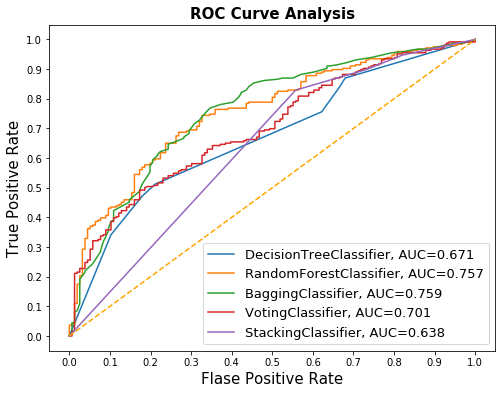

In [36]:
# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

classifiers = [dt,rfc,bagging_clf,voting_clf_soft,stacking_clf]

for cls in classifiers:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[:,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

    
# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()